### Валова София ИУ5-63Б Вариант 2 РК2 ТМО

#### Задание - Методы построения моделей машинного обучения.
Для load_wine (scikit-learn) постройте модели Классификации, используя Дерево решений и Случайный лес. 
Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). 
Какие метрики качества Вы использовали и почему? 
Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple
%matplotlib inline 
sns.set(style="ticks")

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, mean_absolute_error

In [32]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        temp_rec = recall_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values, average='weighted')
        # сохранение результата в словарь
        res[c] = {'Accuracy': temp_acc, 'Recall': temp_rec}
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy \t \t Recall')
    for i in accs:
        print('{} \t {} \t {}'.format(i, accs[i]['Accuracy'], accs[i]['Recall']))

In [3]:
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data=wine['data'], columns= wine['feature_names'])
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

<Axes: >

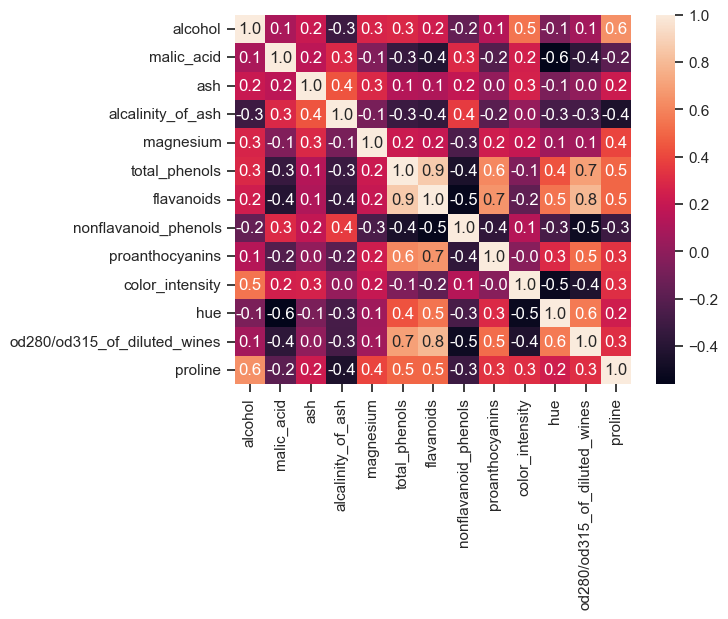

In [10]:
# Масштабирование данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(wine_df)

# Построение тепловой карты корреляции
# Матрица корреляции
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f",)

In [11]:
# Разделим на обучающую и тестовую
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((89, 13), (89,))

### Дерево решений

In [33]:
clf = DecisionTreeClassifier(random_state=1).fit(wine_X_train, wine_y_train)
wine_y_test_predict = clf.predict(wine_X_test)
print_accuracy_score_for_classes(wine_y_test, wine_y_test_predict)
confusion_matrix(wine_y_test, wine_y_test_predict)

Метка 	 Accuracy 	 	 Recall
0 	 0.8181818181818182 	 0.8181818181818182
1 	 0.8823529411764706 	 0.8823529411764706
2 	 0.9545454545454546 	 0.9545454545454546


c:\Users\svalo\OneDrive\Документы\6 сем\ТМО\Лаб2\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\svalo\OneDrive\Документы\6 сем\ТМО\Лаб2\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\svalo\OneDrive\Документы\6 сем\ТМО\Лаб2\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

array([[27,  6,  0],
       [ 2, 30,  2],
       [ 0,  1, 21]], dtype=int64)

In [34]:
confusion_matrix(wine_y_test, wine_y_test_predict)

array([[27,  6,  0],
       [ 2, 30,  2],
       [ 0,  1, 21]], dtype=int64)

In [40]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.12359550561797752

### Случайный лес

In [36]:
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10).fit(wine_X_train, wine_y_train)
wine_y_test_predict_tree = clf.predict(wine_X_test)
print_accuracy_score_for_classes(wine_y_test, wine_y_test_predict_tree)
confusion_matrix(wine_y_test, wine_y_test_predict_tree)

Метка 	 Accuracy 	 	 Recall
0 	 0.8181818181818182 	 0.8181818181818182
1 	 0.8823529411764706 	 0.8823529411764706
2 	 0.9545454545454546 	 0.9545454545454546


c:\Users\svalo\OneDrive\Документы\6 сем\ТМО\Лаб2\env\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\svalo\OneDrive\Документы\6 сем\ТМО\Лаб2\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\svalo\OneDrive\Документы\6 сем\ТМО\Лаб2\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\svalo\OneDrive\Документы\6 сем\ТМО\Лаб2\env\Lib\site-packages\sklea

array([[27,  6,  0],
       [ 2, 30,  2],
       [ 0,  1, 21]], dtype=int64)

In [38]:
mean_absolute_error(wine_y_test, wine_y_test_predict_tree)

0.12359550561797752

Обратив внимание на метрики, можно увидеть, что они показавают одинаковые значения для дерева решений и случайного леса, возможно, в силу маленького количество записей в датасете